# Hausaufgabe 5 

## Integration einer Bewegungsgleichung: Freier Fall - Wiederholung

In dieser Aufgabe werden wir erneut die Bewegungsgleichung des freien Falls numerisch mit dem Euler Verfahren lösen. Die Bewegungsgleichung hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Dieses Mal soll die Bewegungsgleichung nicht "per Hand" sondern rekursiv mittels einer Schleife gelöst werden. 

## 1. Integration mit Schleife

**a)** Lösen Sie erneut Gleichung (1) für fünf Zeitschritte $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch mit Hilfe einer Schleife integrieren. Dabei soll $a=-9.81$ sein. Speichern Sie die numerisch berechneten Positionen in einer Liste indem Sie `append()` benutzen.

Als Erinerrung:

\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

\begin{align}\tag{3}
        x\left(t+\Delta t \right) &= x\left(t\right) + v\left(t\right) \Delta t \\ 
        v\left(t+\Delta t \right) &= v\left(t\right) + a\Delta t \tag{4}
    \end{align}
    


In [1]:
import numpy as np
deltat=0.1
a=-9.81
v=[1]
x=[2]
for i in range (1, 5):
    i= v[i-1]+a*deltat
    v.append(i)
#print(v)    
for n in range (1, 5):
    n=x[n-1]+v[n-1]*deltat
    x.append(n)
print(x)

[2, 2.1, 2.1019, 2.0057, 1.8114]


**b)** Plotten Sie diese Positionen in einem Diagramm mit der Bahnkurve (Gleichung (2)). Benutzen Sie das mit `ax.scatter()` erweiterte Grundgerüst von `helpPlotScatter.ipynb`. 

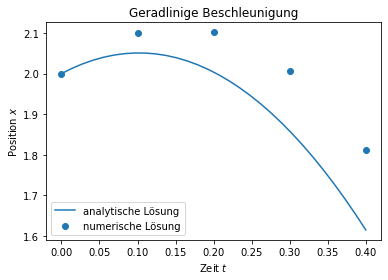

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
x0 = 2.0
v0 = 1.0
a = -9.81

t = np.linspace(0, 4*dt, 30)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

xNumeric = x                           #np.array([x0, x1, x2, x3, x4])
tNumeric = np.linspace(0,4*dt,5) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, xAnalytic, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.scatter(tNumeric, xNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()

## 2. Variation des Zeitschrittes

Sie sollten nun die Abbildung aus Hausaufgabe 3 reproduziert haben.

**a)** Wiederholen Sie Aufgabe 1 mit einem Zeitschritt $\Delta t = 0.005$. Achten Sie darauf, dass die Integrationszeit gleich bleibt! Da Sie nun sehr viele Werte erzeugt haben, ist es sinnvoller die numerische Lösung ebenfalls in einem Linienplot mit `ax.plot()` darzustellen.

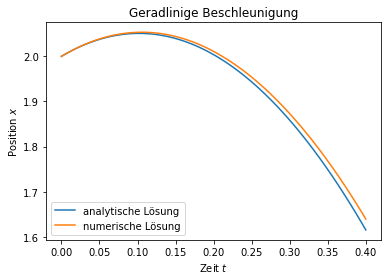

In [3]:
import numpy as np
dt=0.005
a=-9.81
v=[1]
x=[2]
for i in range (1, 80):
    i= v[i-1]+a*dt
    v.append(i)
#print(v)    
for n in range (1, 80):
    n=x[n-1]+v[n-1]*dt
    x.append(n)
#print(x)
t = np.linspace(0, 80*dt, 80)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

xNumeric = x                          
tNumeric = np.linspace(0, 80*dt, 80) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, xAnalytic, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.plot(tNumeric, xNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()
#print(xAnalytic)
#print(xNumeric)

**b)** Berechnen Sie die quadratische Abweichung $\mathrm{SE}\left(t\right)$ zwischen der numerischen und analytischen Lösung abhängig vom Zeitschritt:
   $$ 
   \mathrm{SE}\left(t\right) = \left(x_{\mathrm{numerisch}}\left(t\right) - x_\mathrm{analytisch}\left(t\right)\right) ^2 \, .
   $$
Plotten Sie die quadratische Abweichung gegen die Zeit. Benutzen Sie geeignete Beschriftungen! 

Beschreiben Sie kurz, was Sie beobachten. 

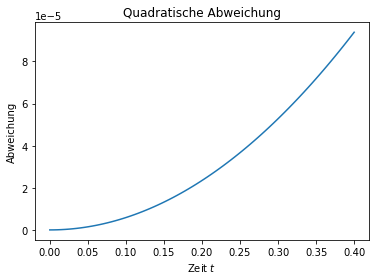

In [4]:
se=[]
for p in range (80):
    p = (xNumeric[p]-(x0 + v0*dt*p + 0.5*a*dt**2*p**2))**2
    se.append(p)
#print(se)

t = np.linspace(0, 0.4, 80)

fig, ax = plt.subplots()

ax.set_title("Quadratische Abweichung")
ax.plot(t, se, label='quadratische Abweichung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Abweichung")

#plt.legend(loc=2)
plt.show()

Was ich beobachte ist, dass die Werte vom selbst Nachgerechneten stark abweichen aber ich den Fehler nicht entdecke. Die Tendenz ist trotzdem: je länger gemessen, desto größer die Abweichung.